In [2]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


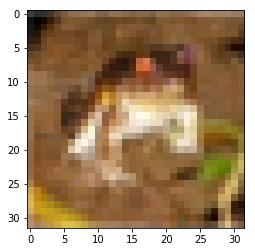

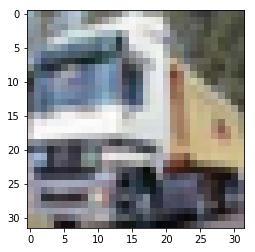

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[1])
plt.show()

In [5]:
x_train = x_train/255
x_test = x_test/255
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [15]:
model = Sequential([
    Conv2D(32,(3,3),padding='same',input_shape=(32,32,3),activation='relu'),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64,(3,3),padding='same',activation='relu'),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(units=512,activation='relu'),
    Dense(units=10,activation='softmax')
])

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2304)              0         
__________

In [17]:
opt = keras.optimizers.rmsprop(lr=0.0001,decay=1e-6)

In [18]:
model.compile(loss='categorical_crossentropy',
             optimizer=opt,
             metrics=['accuracy'])

In [19]:
datagen = ImageDataGenerator(
    rotation_range = 20,
    zoom_range = 0.15,
    horizontal_flip = True,
)

In [20]:
model.fit_generator(datagen.flow(x_train,y_train,batch_size=64),steps_per_epoch = 1000,epochs = 2,
                    validation_data=(x_test,y_test),workers=4,verbose=1)

Epoch 1/2
1000/1000 [==============================] - 138s 138ms/step - loss: 1.7154 - acc: 0.3834 - val_loss: 1.4561 - val_acc: 0.4819

In [21]:

model.save('cifar10_trained_model.h5')

In [22]:
scores = model.evaluate(x_test,y_test,verbose=1)
print('Test loss:',scores[0])
print('Test accuracy:',scores[1])

10000/10000 [==============================] - 7s 654us/step - ETA: 6s